In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("ipl_data.csv")

# Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


## Data Cleaning

In [4]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [5]:
print(f"Shape of Dataset : {df.shape}")
print("Information about Dataset -> ")
df.info()

Shape of Dataset : (76014, 15)
Information about Dataset -> 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [6]:
print("Description about Dataset -> ")
df.describe()

Description about Dataset -> 


,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


In [7]:
df.nunique()

mid               617
date              442
venue              35
bat_team           14
bowl_team          14
batsman           411
bowler            329
runs              252
wickets            11
overs             140
runs_last_5       102
wickets_last_5      8
striker           155
non-striker        88
total             138
dtype: int64

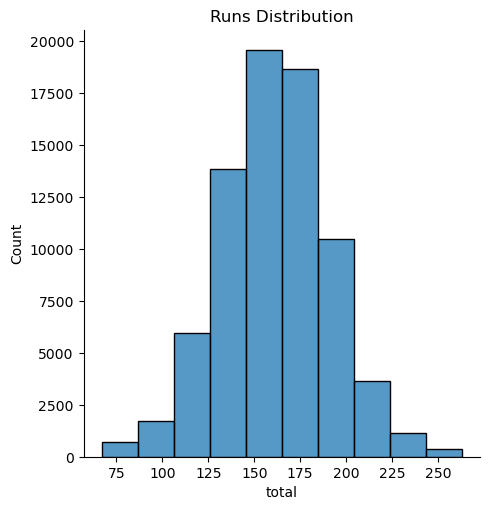

In [8]:
#Runs Distribution
sns.displot(df['total'],kde=False,bins=10)
plt.title("Runs Distribution")

plt.show()

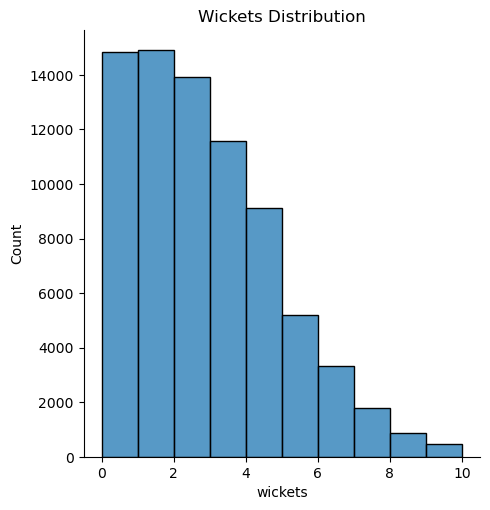

In [9]:
#wicket Distribution
sns.displot(df['wickets'],kde=False,bins=10)
plt.title("Wickets Distribution")

plt.show()

In [10]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

### Removing Irrelevant Columns

In [11]:
irrelevant = ['mid', 'date', 'venue','batsman', 'bowler', 'striker', 'non-striker']
print(f'Before Removing Irrelevant Columns : {df.shape}')
df = df.drop(irrelevant, axis=1) 
print(f'After Removing Irrelevant Columns : {df.shape}')
df.head()

Before Removing Irrelevant Columns : (76014, 15)
After Removing Irrelevant Columns : (76014, 8)


,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


### Removing teams with very less entries

In [12]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [13]:
team_counts = df['bat_team'].value_counts()
team_counts

bat_team
Mumbai Indians                 10213
Kings XI Punjab                 9219
Chennai Super Kings             9142
Royal Challengers Bangalore     8331
Kolkata Knight Riders           8033
Delhi Daredevils                7152
Rajasthan Royals                6643
Deccan Chargers                 5280
Sunrisers Hyderabad             5216
Pune Warriors                   2448
Gujarat Lions                   1726
Rising Pune Supergiant           994
Kochi Tuskers Kerala             876
Rising Pune Supergiants          741
Name: count, dtype: int64

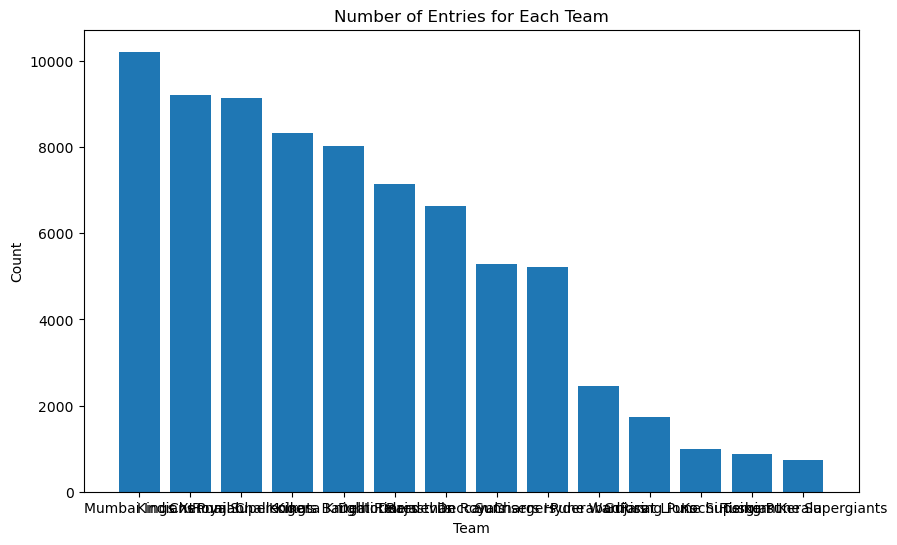

In [14]:
plt.figure(figsize=(10, 6))
plt.bar(team_counts.index, team_counts.values)
plt.title('Number of Entries for Each Team')
plt.xlabel('Team')
plt.ylabel('Count')
plt.show()

In [15]:
popular_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals','Mumbai Indians', 
                 'Kings XI Punjab', 'Royal Challengers Bangalore','Delhi Daredevils', 'Sunrisers Hyderabad']
df = df[(df['bat_team'].isin(popular_teams)) & (df['bowl_team'].isin(popular_teams))]

### Removing First 5 over of Every Match

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53811 entries, 0 to 75888
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bat_team        53811 non-null  object 
 1   bowl_team       53811 non-null  object 
 2   runs            53811 non-null  int64  
 3   wickets         53811 non-null  int64  
 4   overs           53811 non-null  float64
 5   runs_last_5     53811 non-null  int64  
 6   wickets_last_5  53811 non-null  int64  
 7   total           53811 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 3.7+ MB


In [17]:
df = df[df['overs'] >= 5]
df = df.reset_index(drop = True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40108 entries, 0 to 40107
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bat_team        40108 non-null  object 
 1   bowl_team       40108 non-null  object 
 2   runs            40108 non-null  int64  
 3   wickets         40108 non-null  int64  
 4   overs           40108 non-null  float64
 5   runs_last_5     40108 non-null  int64  
 6   wickets_last_5  40108 non-null  int64  
 7   total           40108 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.4+ MB


### Plotting a Correlation matrix

<Axes: >

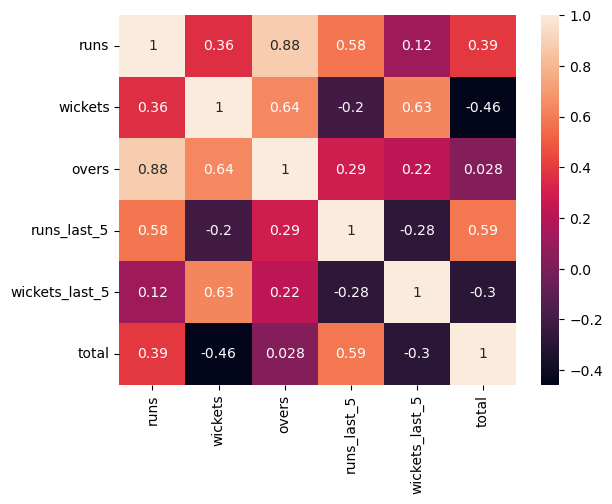

In [59]:
from seaborn import heatmap
dftemp = df[['runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'total']]
heatmap(data=dftemp.corr(), annot=True)

### Performing Label Encoding and One Hot Encoding

In [60]:
categorical_columns = df.columns[df.dtypes == 'object']
categorical_columns

Index([], dtype='object')

In [61]:
for i in range(len(categorical_columns)):
    df = pd.get_dummies(df, columns = [str(categorical_columns[i])], prefix = str(categorical_columns[i]))

In [62]:
df

,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
0,61,0,5.1,59,0,222,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
1,61,1,5.2,59,1,222,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
2,61,1,5.3,59,1,222,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
3,61,1,5.4,59,1,222,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
4,61,1,5.5,58,1,222,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40103,106,9,18.1,29,4,107,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
40104,107,9,18.2,29,4,107,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
40105,107,9,18.3,28,4,107,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
40106,107,9,18.4,24,4,107,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40108 entries, 0 to 40107
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   runs                                   40108 non-null  int64  
 1   wickets                                40108 non-null  int64  
 2   overs                                  40108 non-null  float64
 3   runs_last_5                            40108 non-null  int64  
 4   wickets_last_5                         40108 non-null  int64  
 5   total                                  40108 non-null  int64  
 6   bat_team_Chennai Super Kings           40108 non-null  bool   
 7   bat_team_Delhi Daredevils              40108 non-null  bool   
 8   bat_team_Kings XI Punjab               40108 non-null  bool   
 9   bat_team_Kolkata Knight Riders         40108 non-null  bool   
 10  bat_team_Mumbai Indians                40108 non-null  bool   
 11  ba

In [76]:
bool_columns = df.columns[df.dtypes == bool]
for col in bool_columns:
    df[col] = df[col].astype(int)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40108 entries, 0 to 40107
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   runs                                   40108 non-null  int64  
 1   wickets                                40108 non-null  int64  
 2   overs                                  40108 non-null  float64
 3   runs_last_5                            40108 non-null  int64  
 4   wickets_last_5                         40108 non-null  int64  
 5   total                                  40108 non-null  int64  
 6   bat_team_Chennai Super Kings           40108 non-null  int64  
 7   bat_team_Delhi Daredevils              40108 non-null  int64  
 8   bat_team_Kings XI Punjab               40108 non-null  int64  
 9   bat_team_Kolkata Knight Riders         40108 non-null  int64  
 10  bat_team_Mumbai Indians                40108 non-null  int64  
 11  ba

### Test Train Split

In [78]:
features = df.drop(['total'], axis=1)
labels = df['total']

In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.20, shuffle=True)

In [80]:
X_train.shape

(32086, 21)

In [81]:
X_train.columns

Index(['runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

## Model Training

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

### Linear Regression

In [83]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [84]:
train_predictions_LR = regressor.predict(X_train)

test_predictions_LR = regressor.predict(X_test)

train_mse_LR = mean_squared_error(Y_train, train_predictions_LR)
test_mse_LR = mean_squared_error(Y_test, test_predictions_LR)

print(f'Training MSE: {train_mse_LR}')
print(f'Testing MSE: {test_mse_LR}')

Training MSE: 308.20918594508737
Testing MSE: 283.6503677072288


In [85]:
train_r2 = r2_score(Y_train, train_predictions_LR)
test_r2 = r2_score(Y_test, test_predictions_LR)

print(f'Training R²: {train_r2}')
print(f'Testing R²: {test_r2}')

Training R²: 0.6562806326877881
Testing R²: 0.6712162888112706


### Decision Tree

In [86]:
tree = DecisionTreeRegressor()
tree.fit(X_train, Y_train)

DecisionTreeRegressor()

In [87]:
train_predictions_tree = tree.predict(X_train)

test_predictions_tree = tree.predict(X_test)

train_mse_tree = mean_squared_error(Y_train, train_predictions_tree)
test_mse_tree = mean_squared_error(Y_test, test_predictions_tree)

print(f'Training MSE: {train_mse_tree}')
print(f'Testing MSE: {test_mse_tree}')

Training MSE: 0.13717820856448296
Testing MSE: 119.85268636250312


In [88]:
train_r2 = r2_score(Y_train, train_predictions_tree)
test_r2 = r2_score(Y_test, test_predictions_tree)

print(f'Training R²: {train_r2}')
print(f'Testing R²: {test_r2}')

Training R²: 0.9998470168664434
Testing R²: 0.8610768202533222


### Random Forest

In [89]:
forest = RandomForestRegressor()
forest.fit(X_train, Y_train)

RandomForestRegressor()

In [90]:
train_predictions_forest = forest.predict(X_train)

test_predictions_forest = forest.predict(X_test)

train_mse_forest = mean_squared_error(Y_train, train_predictions_forest)
test_mse_forest = mean_squared_error(Y_test, test_predictions_forest)

print(f'Training MSE: {train_mse_forest}')
print(f'Testing MSE: {test_mse_forest}')

Training MSE: 8.38402896206291
Testing MSE: 57.43847103640683


In [91]:
train_r2 = r2_score(Y_train, train_predictions_forest)
test_r2 = r2_score(Y_test, test_predictions_forest)

print(f'Training R²: {train_r2}')
print(f'Testing R²: {test_r2}')

Training R²: 0.9906500089491785
Testing R²: 0.9334221428126324


### Comparing performance of Random Forest for different max_depths

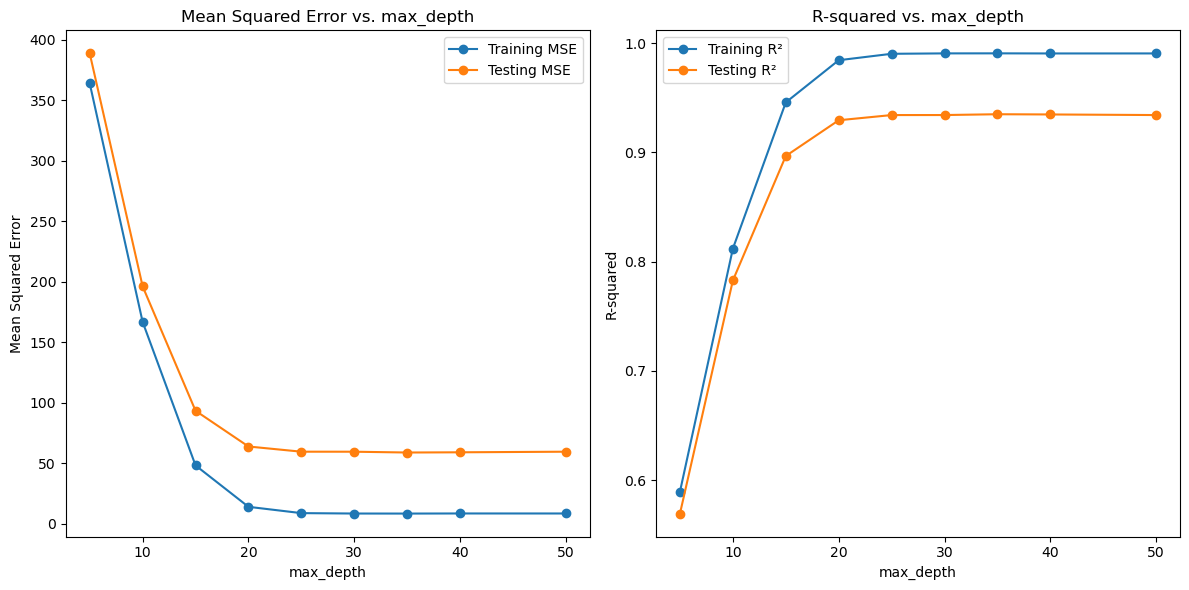

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

max_depth_values = [5, 10, 15, 20, 25, 30, 35, 40, 50]

train_mse_values = []
test_mse_values = []
train_r2_values = []
test_r2_values = []

for max_depth in max_depth_values:
    forest = RandomForestRegressor(max_depth=max_depth)
    forest.fit(X_train, Y_train)

    train_predictions_forest = forest.predict(X_train)

    test_predictions_forest = forest.predict(X_test)

    train_mse = mean_squared_error(Y_train, train_predictions_forest)
    test_mse = mean_squared_error(Y_test, test_predictions_forest)

    train_r2 = r2_score(Y_train, train_predictions_forest)
    test_r2 = r2_score(Y_test, test_predictions_forest)

    train_mse_values.append(train_mse)
    test_mse_values.append(test_mse)
    train_r2_values.append(train_r2)
    test_r2_values.append(test_r2)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(max_depth_values, train_mse_values, label='Training MSE', marker='o')
plt.plot(max_depth_values, test_mse_values, label='Testing MSE', marker='o')
plt.title('Mean Squared Error vs. max_depth')
plt.xlabel('max_depth')
plt.ylabel('Mean Squared Error')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(max_depth_values, train_r2_values, label='Training R²', marker='o')
plt.plot(max_depth_values, test_r2_values, label='Testing R²', marker='o')
plt.title('R-squared vs. max_depth')
plt.xlabel('max_depth')
plt.ylabel('R-squared')
plt.legend()

plt.tight_layout()
plt.show()


# Deep Neural Network Implementation

In [92]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [94]:
X_train_NN = X_train.to_numpy()
X_test_NN = X_test.to_numpy()
Y_train_NN = Y_train.to_numpy()
Y_test_NN = Y_test.to_numpy()

In [95]:
model = keras.Sequential(
    [
        layers.Dense(256, activation = 'relu', name = 'hidden_1'),
        layers.Dense(256, activation = 'relu', name = 'hidden_2'),
        layers.Dense(128, activation = 'relu', name = 'hidden_3'),
        layers.Dense(128, activation = 'relu', name = 'hidden_4'),
        layers.Dense(64, activation = 'relu', name = 'hidden_5'),
        layers.Dense(64, activation = 'relu', name = 'hidden_6'),
        layers.Dense(32, activation = 'relu', name = 'hidden_7'),
        layers.Dense(32, activation = 'relu', name = 'hidden_8'),
        layers.Dense(1, activation = 'relu', name = 'output')
    ]
)

In [96]:
model.compile(
    loss =  keras.losses.MeanSquaredError(), 
    optimizer = keras.optimizers.legacy.Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-07),
    metrics = ['mae', 'mse']
)

In [97]:
model.fit(X_train_NN, Y_train_NN, epochs = 40, batch_size = 128, verbose = True)

Epoch 1/40
251/251 [==============================] - 1s 2ms/step - loss: 2274.7708 - mae: 34.2271 - mse: 2274.7708
Epoch 2/40
251/251 [==============================] - 1s 2ms/step - loss: 754.5051 - mae: 21.5993 - mse: 754.5051
Epoch 3/40
251/251 [==============================] - 1s 2ms/step - loss: 468.2490 - mae: 16.8715 - mse: 468.2490
Epoch 4/40
251/251 [==============================] - 1s 2ms/step - loss: 360.5470 - mae: 14.5646 - mse: 360.5470
Epoch 5/40
251/251 [==============================] - 1s 2ms/step - loss: 335.7562 - mae: 13.9081 - mse: 335.7562
Epoch 6/40
251/251 [==============================] - 1s 2ms/step - loss: 302.6897 - mae: 13.0902 - mse: 302.6897
Epoch 7/40
251/251 [==============================] - 1s 2ms/step - loss: 296.8856 - mae: 12.9158 - mse: 296.8856
Epoch 8/40
251/251 [==============================] - 1s 2ms/step - loss: 288.4434 - mae: 12.6600 - mse: 288.4434
Epoch 9/40
251/251 [==============================] - 1s 2ms/step - loss: 292.4055 - m

In [98]:
predictions = model.predict(X_test_NN)
r2 = r2_score(Y_test_NN, predictions)
print("Test R2 score:", r2)

251/251 [==============================] - 0s 662us/step
Test R2 score: 0.7463307323350123


In [99]:
predictions = model.predict(X_train_NN)
r2 = r2_score(Y_train_NN, predictions)
print("Train R2 score:", r2)

1003/1003 [==============================] - 1s 565us/step
Train R2 score: 0.7544016109118801


In [ ]:
model.save('NN_Model.h5')

## Predictions

In [100]:
def score_predict(batting_team, bowling_team, runs, wickets, overs, runs_last_5, wickets_last_5, model=forest):
    prediction_array = [runs, wickets, overs, runs_last_5, wickets_last_5]
    # Batting Team
    if batting_team == 'Chennai Super Kings':
        prediction_array = prediction_array + [1,0,0,0,0,0,0,0]
    elif batting_team == 'Delhi Daredevils':
        prediction_array = prediction_array + [0,1,0,0,0,0,0,0]
    elif batting_team == 'Kings XI Punjab':
        prediction_array = prediction_array + [0,0,1,0,0,0,0,0]
    elif batting_team == 'Kolkata Knight Riders':
        prediction_array = prediction_array + [0,0,0,1,0,0,0,0]
    elif batting_team == 'Mumbai Indians':
        prediction_array = prediction_array + [0,0,0,0,1,0,0,0]
    elif batting_team == 'Rajasthan Royals':
        prediction_array = prediction_array + [0,0,0,0,0,1,0,0]
    elif batting_team == 'Royal Challengers Bangalore':
        prediction_array = prediction_array + [0,0,0,0,0,0,1,0]
    elif batting_team == 'Sunrisers Hyderabad':
        prediction_array = prediction_array + [0,0,0,0,0,0,0,1]
    # Bowling Team
    if bowling_team == 'Chennai Super Kings':
        prediction_array = prediction_array + [1,0,0,0,0,0,0,0]
    elif bowling_team == 'Delhi Daredevils':
        prediction_array = prediction_array + [0,1,0,0,0,0,0,0]
    elif bowling_team == 'Kings XI Punjab':
        prediction_array = prediction_array + [0,0,1,0,0,0,0,0]
    elif bowling_team == 'Kolkata Knight Riders':
        prediction_array = prediction_array + [0,0,0,1,0,0,0,0]
    elif bowling_team == 'Mumbai Indians':
        prediction_array = prediction_array + [0,0,0,0,1,0,0,0]
    elif bowling_team == 'Rajasthan Royals':
        prediction_array = prediction_array + [0,0,0,0,0,1,0,0]
    elif bowling_team == 'Royal Challengers Bangalore':
        prediction_array = prediction_array + [0,0,0,0,0,0,1,0]
    elif bowling_team == 'Sunrisers Hyderabad':
        prediction_array = prediction_array + [0,0,0,0,0,0,0,1]
        
    prediction_array = np.array([prediction_array])
    pred = model.predict(prediction_array)
    return int(round(pred[0]))

In [104]:
batting_team='Delhi Daredevils'
bowling_team='Chennai Super Kings'
score = score_predict(batting_team, bowling_team, overs=10.2, runs=68, wickets=0, runs_last_5=29, wickets_last_5=1)
print(f'Predicted Score : {score}')

Predicted Score : 164


In [105]:
batting_team='Mumbai Indians'
bowling_team='Kings XI Punjab'
score = score_predict(batting_team, bowling_team, overs=12.3, runs=113, wickets=2, runs_last_5=55, wickets_last_5=0)
print(f'Predicted Score : {score} ')

Predicted Score : 188 


In [106]:
batting_team="Kings XI Punjab"
bowling_team="Rajasthan Royals"
score =score_predict(batting_team, bowling_team, overs=18.0, runs=18, wickets=1, runs_last_5=45, wickets_last_5=0)
print(f'Predicted Score : {score}')

Predicted Score : 151


In [ ]:
import pickle
filename = "final_model.pkl"
pickle.dump(forest, open(filename, "wb"))